### Task 2

For my surface plot I used a SVD (singular value decomposition) to reduce dimensionality and project my data points to a 2D plane. The axes were determined by the 2 most significant features.

The k I chose (25), was not too small as to make the decision bundary jagged (as the model would be sensitive to infrequent noise points); and was not too large as to have classification affected by irrelevent classes. 

I used the euclidean distance metric to determine the 25 nearest neighbours. This affected the decision boundary by???

In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score #NOT NECESSARY?
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../../train.csv")
X = df["Text"].values
y = df["Category"].values

m = 0.9 # proportion of data for training vs validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=m, random_state=42, shuffle=True)
# max_df=0.7?? Could alter number, ignores terms appearing in more than 70% of docs


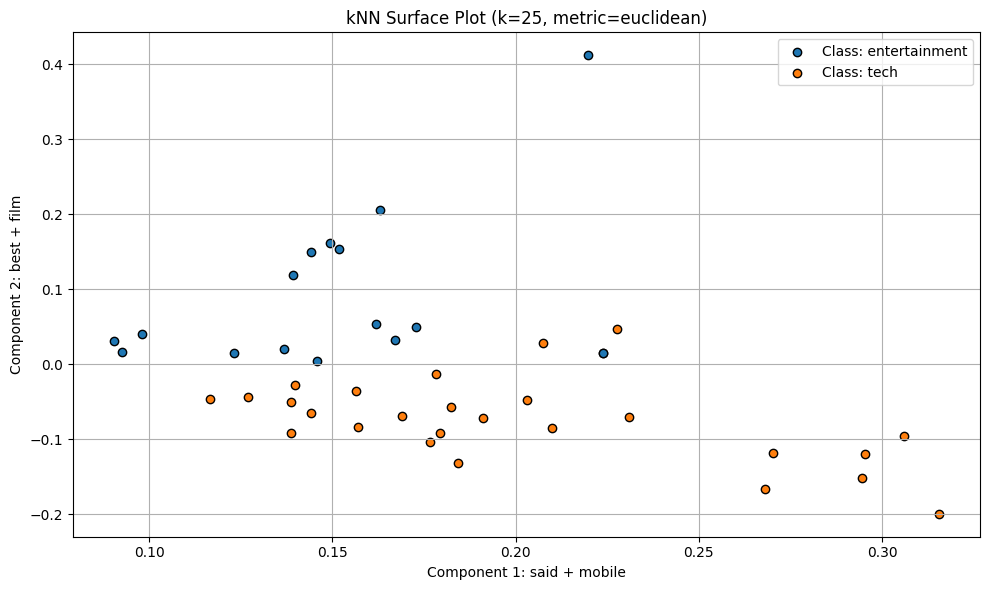

In [265]:
def build_classifier(k, p, X_train_vec, y):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    knn.fit(X_train_vec, y)
    return knn

def predict_class(knn, X_test_vec):
    return knn.predict(X_test_vec)

def create_surface_plot(X_train_vec, X_test_vec, y_pred, vectoriser, k, metric, top_n):
    # Fit SVD (on training data)
    svd = TruncatedSVD(n_components=2, random_state=42)
    X_train_2d = svd.fit_transform(X_train_vec)
    X_test_2d = svd.transform(X_test_vec)

    # Get top feature names for axis labels
    feature_names = vectoriser.get_feature_names_out()
    component_1_words = [feature_names[i] for i in np.argsort(svd.components_[0])[::-1][:top_n]]
    component_2_words = [feature_names[i] for i in np.argsort(svd.components_[1])[::-1][:top_n]]

    # Plot surface and points
    plt.figure(figsize=(10, 6))
    for label in np.unique(y_pred):
        idx = y_pred == label
        plt.scatter(X_test_2d[idx, 0], X_test_2d[idx, 1], label=f"Class: {label}", edgecolor='k')

    plt.xlabel(f"Component 1: {' + '.join(component_1_words)}")
    plt.ylabel(f"Component 2: {' + '.join(component_2_words)}")
    plt.title(f"kNN Surface Plot (k={k}, metric={metric})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    # Vectorized text using TF-IDF
    vectoriser = TfidfVectorizer()
    X_train_vec = vectoriser.fit_transform(X_train)
    X_test_vec = vectoriser.transform(X_val)

    k = 25
    distance_metrics = ["manhatan", "euclidean"]
    metric = "euclidean"
    p = distance_metrics.index(metric) + 1
    
    knn = build_classifier(k, p, X_train_vec, y_train)
    y_pred = predict_class(knn, X_test_vec)
    
    create_surface_plot(X_train_vec, X_test_vec, y_pred, vectoriser, k, metric, 2)
    
main()


In [266]:
def yeet(X_train_2d, metric, k):
    knn_2d = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_2d.fit(X_train_2d, y_train)
    
   # 3. Create decision surface
    h = 0.3
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='Pastel1')

    ############
    for k in range(1, 380, 10):
        knn = build_classifier(k, p, X_train_vec, y_train)
        y_pred = predict_class(knn, X_test_vec)
        #NOT NECESSARY?
        accuracy = accuracy_score(y_val, y_pred)
        print(f"k={k} Test Accuracy: {accuracy:.2f}")
    

### Task 3

(a) We explore how the size of the training data set affects the test and train accuracy. For each
value of m in [0.1, 0.3, 0.5, 0.7, 0.9], train your classifier on the first m portion of the training
examples (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). Please report two
plots: (i) training and (ii) testing accuracy for each such value of m with the x-axis referring to m
and the y-axis referring to the classification accuracy in 𝐹1 measure as shown below. In total,
there should be four curves for training accuracy and four curves for testing accuracy. Explain
the general trend of the two plots in terms of training and testing accuracy if any.

create plot with each proportion m of training data. Two lines/plots, one for testing accuracy (F1 measure) the othger for train accuracy (F1 measure).

Explain findings



In [267]:
#train classifier on different training sizes
for m in range(0.1, 1, 0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=m, random_state=42, shuffle=True)
    main() #might need to rename function
    #train/test accuract


(b) Let’s use 5-fold cross-validation to assess model performance. Investigate the impact of key
hyperparameters of your choices for each classifier using a testing dataset. E.g., for SVM, the
classification accuracy may be significantly affected by the kernels and hyperparameter
combination. List hyperparameters for each classifier and demonstrate how these
hyperparameters impact on the testing accuracy.

assess different k's
assess diff max idfs
assess diffferent distance metrics
assess different weights assigned to neighbors

In [268]:
#use 5-fold CV to assess performance, experiment w diff hyperparams